In [30]:
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [31]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [32]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [33]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [34]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(
    filters=16,
    kernel_size=(5,5),
    padding='same',
    input_shape=(28,28,1),
    activation='relu'

))

In [38]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model.add(Conv2D(
    filters=36,
    kernel_size=(5,5),
    padding='same',
    activation='relu'

))

In [40]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
model.add(Dropout(0.25))

In [42]:
model.add(Flatten())

In [43]:
model.add(Dense(128, activation='relu'))

In [44]:
model.add(Dropout(0.5))

In [45]:
model.add(Dense(10, activation='softmax'))

In [46]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 36)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1764)             

In [47]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [48]:
train_history = model.fit(
    x = x_Train4D_normalize,
    y = y_TrainOneHot,
    validation_split=0.2,
    epochs=10,
    batch_size=300,
    verbose=2
    )

Epoch 1/10


160/160 - 3s - loss: 0.4691 - accuracy: 0.8534 - val_loss: 0.0981 - val_accuracy: 0.9706 - 3s/epoch - 22ms/step
Epoch 2/10
160/160 - 3s - loss: 0.1320 - accuracy: 0.9602 - val_loss: 0.0631 - val_accuracy: 0.9812 - 3s/epoch - 17ms/step
Epoch 3/10
160/160 - 3s - loss: 0.0961 - accuracy: 0.9712 - val_loss: 0.0499 - val_accuracy: 0.9850 - 3s/epoch - 18ms/step
Epoch 4/10
160/160 - 3s - loss: 0.0783 - accuracy: 0.9771 - val_loss: 0.0445 - val_accuracy: 0.9873 - 3s/epoch - 17ms/step
Epoch 5/10
160/160 - 3s - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0385 - val_accuracy: 0.9889 - 3s/epoch - 17ms/step
Epoch 6/10
160/160 - 3s - loss: 0.0590 - accuracy: 0.9822 - val_loss: 0.0372 - val_accuracy: 0.9883 - 3s/epoch - 17ms/step
Epoch 7/10
160/160 - 3s - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.0362 - val_accuracy: 0.9898 - 3s/epoch - 18ms/step
Epoch 8/10
160/160 - 3s - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0332 - val_accuracy: 0.9908 - 3s/epoch - 20ms/step
Epoch 9/10
160/160 - 3s - l

In [49]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

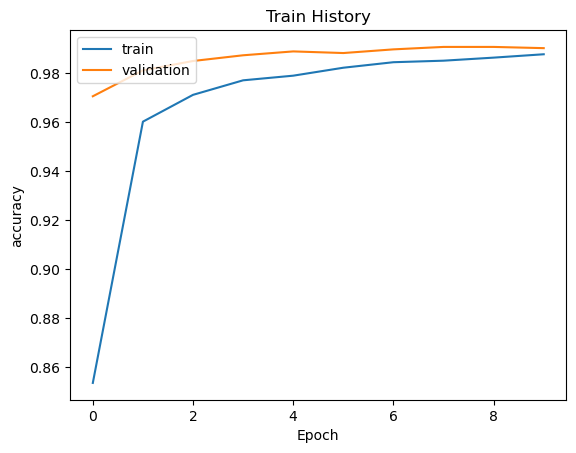

In [50]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

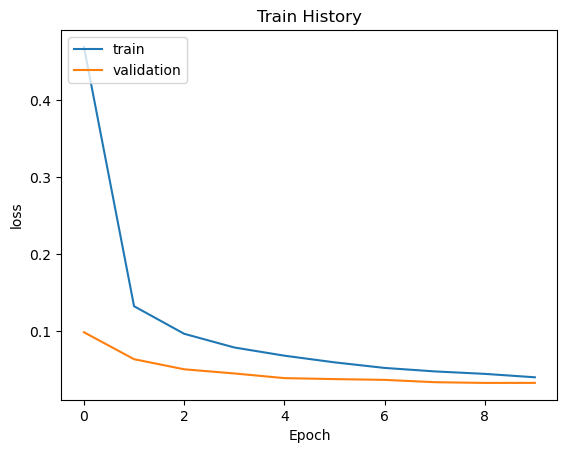

In [51]:
show_train_history(train_history, 'loss', 'val_loss')

In [52]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0230 - accuracy: 0.9923


0.9922999739646912

In [53]:
prediction = model.predict_classes(x_Train4D_normalize)
prediction[:10]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

NameError: name 'prediction' is not defined